In [53]:
#http://overpass-turbo.eu/
import pandas as pd
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="HU"][admin_level=2];
(node["tourism"="museum"](area);
 way["tourism"="museum"](area);
 rel["tourism"="museum"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [27]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.61.5 4133829e',
 'osm3s': {'timestamp_osm_base': '2023-09-13T16:03:14Z',
  'timestamp_areas_base': '2023-09-13T10:34:00Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 264057019,
   'lat': 47.5011815,
   'lon': 19.0483176,
   'tags': {'addr:city': 'Budapest',
    'addr:housenumber': '6',
    'addr:postcode': '1051',
    'addr:street': 'Vigyázó Ferenc utca',
    'email': 'szlankaa@otpbank.hu',
    'fee': 'no',
    'name': 'OTP Bank Pénzügytörténeti Gyűjtemény',
    'opening_hours': 'Mo-We 09:00-16:00, Th 09:00-14:00 "on appointment"',
    'phone': '+36 1 473 5617',
    'tourism': 'museum'}},
  {'type': 'node',
   'id': 266838745,
   'lat': 47.508987,
   'lon': 19.0541543,
   'tags': {'addr:city': 'Budapest',
    'addr:housenumber': '22',
    'addr:postcode': '1055',
    'addr:street': 'Markó utca',
    'email': 'mentomuze

{'type': 'node', 'id': 871669036, 'lat': 47.7452949, 'lon': 18.1384013, 'tags': {'tourism': 'museum'}}
{'type': 'node', 'id': 1085803923, 'lat': 45.9907361, 'lon': 18.6908238, 'tags': {'tourism': 'museum'}}
{'type': 'node', 'id': 1349489431, 'lat': 48.0956667, 'lon': 20.7851962, 'tags': {'addr:city': 'Miskolc', 'addr:housenumber': '28', 'addr:postcode': '3529', 'addr:street': 'Görgey Artúr utca', 'fee': 'yes', 'tourism': 'museum'}}
{'type': 'node', 'id': 1449747283, 'lat': 47.216437, 'lon': 20.74896, 'tags': {'tourism': 'museum'}}
{'type': 'node', 'id': 1595931510, 'lat': 47.0006634, 'lon': 21.4883826, 'tags': {'tourism': 'museum'}}
{'type': 'node', 'id': 1620261094, 'lat': 47.3895932, 'lon': 16.5385461, 'tags': {'tourism': 'museum', 'wheelchair': 'yes'}}
{'type': 'node', 'id': 1928856586, 'lat': 47.5926821, 'lon': 19.8529249, 'tags': {'tourism': 'museum'}}
{'type': 'node', 'id': 1975866185, 'lat': 47.5810844, 'lon': 18.3991081, 'tags': {'addr:postcode': '2800', 'addr:street': 'Szent B

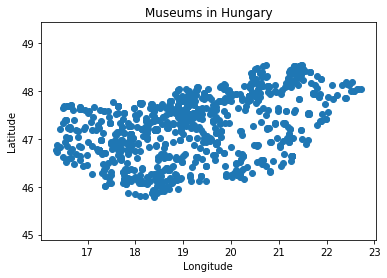

In [51]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list

lts = []
lns = []
nms = [] 
for element in data['elements']:
  if element['type'] == 'node':
    lns.append(element['lon'])
    lts.append(element['lat'])
    try:
        nms.append(element['tags']['name'])
    except:
        print(element)
        nms.append("Unknown")
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Museums in Hungary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [54]:
df = pd.DataFrame(
    {'Lat': lts,
     'Long': lns,
     'Name': nms
    })

In [29]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [67]:
# Create a map
m1 = folium.Map(location=[47.32,20.0589], tiles='cartodbpositron', zoom_start=7)

# Add points to the map
for idx, row in df.iterrows():
    Marker([row['Lat'], row['Long']],popup=row['Name']).add_to(m1)

# Display the map
m1

In [70]:
m2 = folium.Map(location=[47.32,20.0589], tiles='cartodbpositron', zoom_start=7)
HeatMap(data=df[['Lat', 'Long']], radius=10).add_to(m2)
m2